from https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset/code

In [1]:
#!pip install pandas

In [2]:
import pandas as pd

In [129]:
df=pd.read_csv('twitter_MBTI.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB


(7811, 3)


<Axes: >

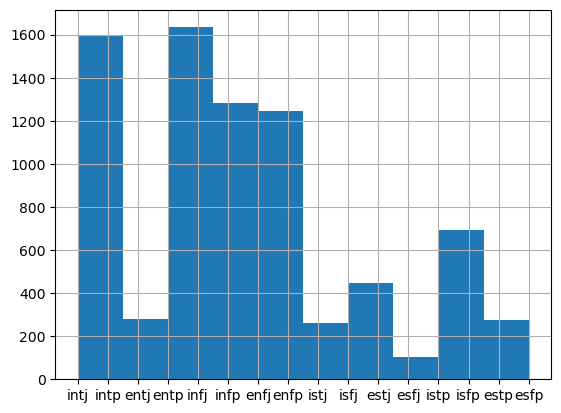

In [130]:
print(df.shape)
df.label.hist()

In [136]:
f = pd.Series(['m©ª«zy', '¤¥uw', 'ÆÇval 672'])
d= f.str.encode('ascii', 'ignore').str.decode('ascii')
print("After removing non-ascii:")
print(d)

After removing non-ascii:
0        mzy
1         uw
2    val 672
dtype: object


In [137]:
# nb each text contains multiple tweets seperated with ||| Was going to burst these, but don'tthink it adds value
# but definitely works removing @handles, and urls (probably)
import re
def rmhand(s):
    return re.sub('@[^\s]*','',s)
def rmurl(s):
    return re.sub('https://[^\s]*','',s)
def rmtags(s):
    return re.sub('#','',s)
def rmpipes(s):
    return re.sub('\|\|','',s)

def clean_tweets(s):  
    s=s.str.encode('ascii','ignore').str.decode('ascii')
    s=s.apply( rmhand )
    s=s.apply(rmurl)
    s=s.apply(rmtags)
    s=s.apply(rmpipes)
    s=s.apply(lambda x:x.lower())
    return s
test=pd.Series(['xxx @yz zzz','start https://spug end || more'])
clean_tweets(test)
df.text=clean_tweets(df.text)

['intj' 'intp' 'entj' 'entp' 'infj' 'infp' 'enfj' 'enfp' 'istj' 'isfj'
 'estj' 'esfj' 'istp' 'isfp' 'estp' 'esfp']
intj (81, 3)
intp (161, 3)
entj (241, 3)
entp (321, 3)
infj (401, 3)
infp (481, 3)
enfj (561, 3)
enfp (641, 3)
istj (721, 3)
isfj (801, 3)
estj (881, 3)
esfj (961, 3)
istp (1041, 3)
isfp (1121, 3)
estp (1201, 3)
esfp (1281, 3)


<Axes: >

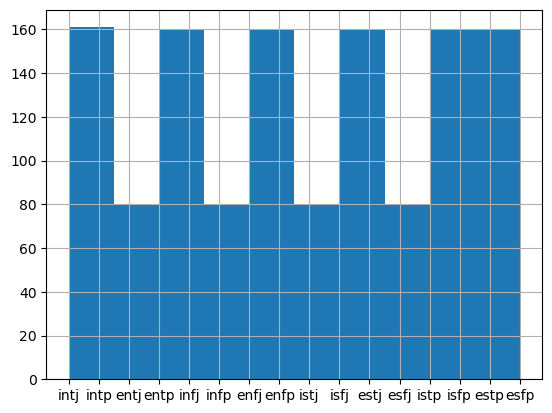

In [138]:
# get fully balanced sample
# firstly get labels
types=df.label.unique()
print(types)
# then get nsamp of each
nsamp=80
t='intj'
df.query('label=="'+t+'"')
working_df=df.head(1)
for t in types:    
    working_df=pd.concat([working_df,df.query('label=="'+t+'"').sample(nsamp)])
    print(t,working_df.shape)
# clean it
working_df.text=clean_tweets(working_df.text)
working_df.label.hist()  
    

In [139]:
working_df

,Unnamed: 0,text,label
0,0,"the pope is infallible, this is a catholic ...",intj
33,33,"a stroke. oh judy, i really pray for your ful...",intj
1541,1541,i just realised i'm an intj!| you can talk s...,intj
7323,7323,u soft tho|white folks yall gotta jus replace...,intj
2348,2348,"okay, i see. thanks for the explanation!| i d...",intj
...,...,...,...
3909,3909,come into the water by mitski| show &amp; tel...,esfp
7232,7232,no and i want it so bad| congratz on the wo...,esfp
3146,3146,what does it mean| what does it mean| how bad...,esfp
7230,7230,me today| want sza hair for my birthday | im...,esfp


In [140]:
# rescale with tf-idf
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=5, stop_words='english',ngram_range=(1,1),norm=None).fit(working_df.text)
X = vectorizer.transform(working_df.text)
y=working_df.label
# find maximum value for each of the features over dataset:
max_value = X.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())
print(f'{len(feature_names)} features')
print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-40:]]))

13004 features
Features with lowest tfidf:
['dramatic' 'apart' 'aside' 'stealing' 'hurting' 'crowd' 'lik' 'finger'
 'supportive' '1000' 'headache' 'experienced' 'attacked' 'upcoming'
 'leaves' 'tie' '4k' 'bites' 'secure' 'cheer']
Features with highest tfidf: 
['naked' 'poetry' 'chile' '11' 'seunghun' 'nft' '33' 'stars' 'dahyun'
 'wordle' '17' 'order' 'unnie' '05' 'track' 'pre' 'lee' 'nct' 'seventeen'
 'followed' 'pm' '12' 'selling' 'follow' 'amen' 'ka' '04' 'unfollowed'
 '06' 'raid' 'sector' 'flag' 'checked' 'automatically' 'shopee' 'cix'
 'loveisland' '22' 'kst' '07']


In [141]:
from sklearn.model_selection import train_test_split
# setup for fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# vect = CountVectorizer().fit(text_train)
# X_train = vect.transform(text_train)
# print("X_train:\n{}".format(repr(X_train)))

In [142]:
# feature_names = vect.get_feature_names()
# print("Number of features: {}".format(len(feature_names)))
# print("First 20 features:\n{}".format(feature_names[:20]))
# print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
# print("Every 2000th feature:\n{}".format(feature_names[::2000]))

In [143]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier # 0.38
from sklearn.neighbors import KNeighborsClassifier # brutal
from sklearn.neural_network import MLPClassifier # poor 0.12
from sklearn.ensemble import RandomForestClassifier # 0.4
from sklearn.metrics import classification_report
#scores = cross_val_score(LogisticRegression(max_iter=500), X_train, y_train, cv=2)
#print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
reg=RandomForestClassifier().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(classification_report(y_pred,y_test,target_names=types))

              precision    recall  f1-score   support

        intj       0.36      0.33      0.34        30
        intp       0.30      0.34      0.32        29
        entj       0.35      0.31      0.33        26
        entp       0.22      0.47      0.30        15
        infj       0.55      0.20      0.29        61
        infp       0.23      0.26      0.24        19
        enfj       0.57      0.50      0.53        26
        enfp       0.25      0.35      0.29        17
        istj       0.30      0.53      0.38        17
        isfj       0.50      0.52      0.51        27
        estj       0.57      0.42      0.48        31
        esfj       0.42      0.38      0.40        26
        istp       0.46      0.31      0.37        35
        isfp       0.44      0.48      0.46        25
        estp       0.28      0.57      0.37        14
        esfp       0.45      0.56      0.50        25

    accuracy                           0.38       423
   macro avg       0.39   

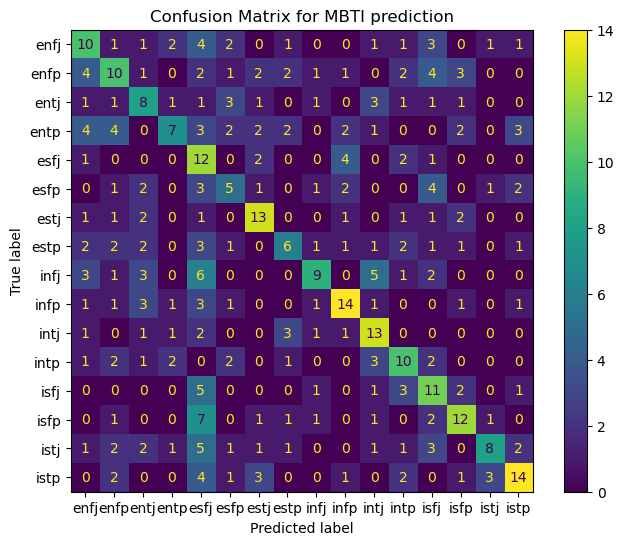

In [144]:
from sklearn.metrics import confusion_matrix

# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=reg.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for MBTI prediction')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

In [14]:
!pip install happybase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for happybase: filename=happybase-1.2.0-py2.py3-none-any.whl size=26604 sha256=7c5655bed6b5e84f0ae70f749819249dd98ba6d6600803b1a533e454bbcc0a6c
  Stored in directory: /home/hduser/.cache/pip/wheels/9a/27/7b/f53cd56678a818d535097bffa4092086b41d0404781ffbc640
  Created wheel for thriftpy2: filename=thriftpy2-0.4.16-cp310-cp310-linux_x86_64.whl size=511370 sha256=4de101db3efd24e6c025f5325492dd8e160b6445acfde3d944a591e4caee2211
  Stored in directory: /home/hduser/.cache/pip/wheels/c1/26/64/cbf22aaa52bcd7c2e3201a3ecfaa0a82c5ca1887369168e2ca
Successfully built happybase thriftpy2


In [227]:
import happybase

connection = happybase.Connection('localhost')
table = connection.table('wordcount')

In [228]:
table.row(b'1')

{b'cf:count': b'48',
 b'cf:doc_id': b'000000000',
 b'cf:label': b'intj',
 b'cf:word': b'a'}

In [229]:
rows = table.scan()

In [230]:
# furthermore
data = [row[1] for row in rows]     

In [231]:
hdf = pd.DataFrame(data)

In [233]:
hdf.shape

(3563458, 4)

In [234]:
hdf.head()

,b'cf:count',b'cf:doc_id',b'cf:label',b'cf:word'
0,b'48',b'000000000',b'intj',b'a'
1,b'1',b'000000000',b'intj',b'adoration'
2,b'1',b'000000000',b'intj',b'checked'
3,b'1',b'000000000',b'intj',b'asked'
4,b'1',b'000000002',b'intj',b'reward'


In [235]:
# rename columns and reassign data from binary 
hdf.rename(columns={b'cf:doc_id':'doc_id',b'cf:count':'ccount',b'cf:label':'label',b'cf:word':'word'},inplace=True)

In [236]:
hdf.ccount=hdf.ccount.astype(int)
hdf.label=hdf.label.astype(str)
hdf.word=hdf.word.astype(str)
hdf.doc_id=hdf.doc_id.astype(str)

In [237]:
hdf

,ccount,doc_id,label,word
0,48,000000000,intj,a
1,1,000000000,intj,adoration
2,1,000000000,intj,checked
3,1,000000000,intj,asked
4,1,000000002,intj,reward
...,...,...,...,...
3563453,1,000000215,istp,random
3563454,1,000000215,istp,rare
3563455,1,000000215,istp,reading
3563456,2,000000215,istp,real


In [238]:
hdf.ccount.max()

837

In [243]:
# we have individual document frequency, now generate total frequency
words_df=pd.DataFrame(data=hdf.word.unique(),columns=['word'])

In [246]:
word_dict=dict.fromkeys(hdf.word.unique(),0)
for w in word_dict.keys():
    word_dict[w]=hdf.query('word==@w').ccount.sum()

In [1]:
import pickle
# print(word_dict['the'])
# with open('word_dict.pickle', 'wb') as f:
#     pickle.dump(word_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

with open('word_dict.pickle', 'rb') as f:
    w2 = pickle.load(f)
print(w2['the'])

246587


from TfdIdVectorizer:    
The formula that is used to compute the tf-idf for a term t of a document d in a document set is tf-idf(t, d) = tf(t, d) * idf(t), and the idf is computed as idf(t) = log [ n / df(t) ] + 1 (if smooth_idf=False), where n is the total number of documents in the document set and df(t) is the document frequency of t; the document frequency is the number of documents in the document set that contain the term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. (Note that the idf formula above differs from the standard textbook notation that defines the idf as idf(t) = log [ n / (df(t) + 1) ]).

In [9]:
import pandas as pd
sdf=pd.read_csv('small.csv')
sdf

,ccount,doc_id,label,word
0,7,0,intj,the
1,2,0,intj,a
2,8,0,intj,as
3,3,1,espi,a
4,11,1,espi,the


In [55]:
# tf/idf from https://monkeylearn.com/blog/what-is-tf-idf
import numpy as np
from collections import OrderedDict
import math
od=OrderedDict(w2)
from scipy.sparse import csr_matrix  # use lil instead
from scipy.sparse import lil_matrix
HX = lil_matrix((100,246587))
Hy=[]
# how many token instances in totallity? 
total_tokens=sum(od.values())
i=0
docs=sdf.groupby('label')[['word','ccount']]
for label,frame in docs:
    Hy+=[label]
    doctot=frame.ccount.sum()  # shudder to think of inefficency of doing this
    for index,row in frame.iterrows():
        # destination in sparse
        j=list(od.keys()).index(row.word)
        # document frequency
        tf=math.log(1+ od[row.word] / total_tokens)
        idf=row.ccount
        print(f'[{i},{j}]')
        HX[i,j]=tf*idf
    i=i+1
Hy,HX

[0,0]
[0,76]
[1,76]
[1,0]
[1,271]


(['espi', 'intj'],
 <100x246587 sparse matrix of type '<class 'numpy.float64'>'
 	with 5 stored elements in List of Lists format>)

In [54]:
S[1,76]

0.32185993742749136

In [27]:
list(w2).index('the')

76

In [125]:
X

<1281x12939 sparse matrix of type '<class 'numpy.float64'>'
	with 445505 stored elements in Compressed Sparse Row format>

In [126]:
y

0       intj
1543    intj
6450    intj
7273    intj
7327    intj
        ... 
1909    esfp
6143    esfp
1915    esfp
5873    esfp
3536    esfp
Name: label, Length: 1281, dtype: object

In [127]:
X[0]

<1x12939 sparse matrix of type '<class 'numpy.float64'>'
	with 457 stored elements in Compressed Sparse Row format>

In [161]:
f'{8:010}'

'0000000008'

In [167]:
X[0,1]

1.0

In [168]:
# calculate and assign total document frequency for each word
print('unique words:',len(hdf.word.unique()))

unique words: 396699


In [169]:
hdf.word.unique()

array(['!', '!!!!!!!!!!!', '"best', ..., 'barbican', 'incomplete)',
       'incomprehensible.'], dtype=object)

In [172]:
import re
print( re.match(r'^[a-zA-Z]*$','hello!'))

None
